#### Imports 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.float_format', lambda x: '%.2f' %x)

#### loading an Checking Data 

In [33]:
data = pd.read_csv('kc_house_data.csv')
data .head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### Checking null

In [34]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [35]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


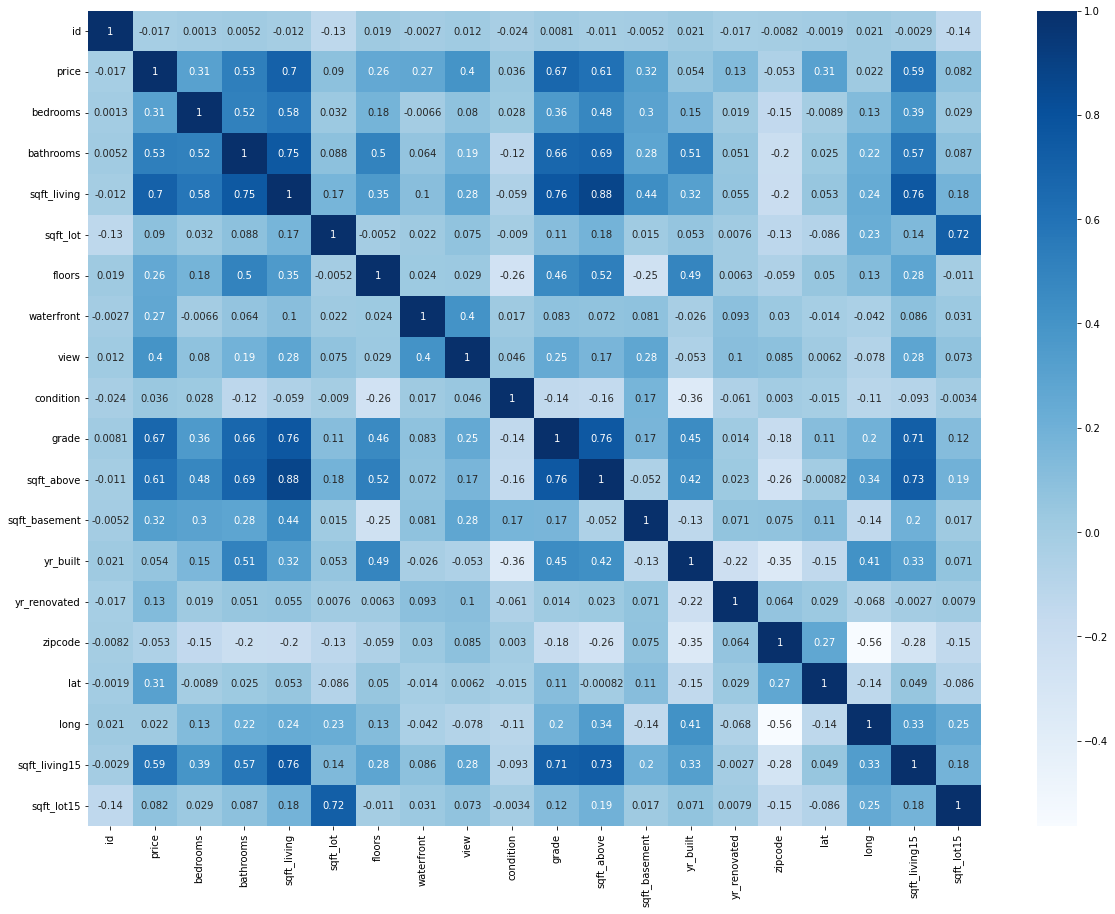

In [36]:
cor = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [37]:
data.corr()['price'].sort_values(ascending=False)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.31
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
id              -0.02
zipcode         -0.05
Name: price, dtype: float64

In [38]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data = data.drop('date', axis=1)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,0,3,...,1955,0,98178,47.51,-122.26,1340,5650,2014,10,13
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,0,3,...,1951,1991,98125,47.72,-122.32,1690,7639,2014,12,9
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,0,3,...,1933,0,98028,47.74,-122.23,2720,8062,2015,2,25
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0,0,5,...,1965,0,98136,47.52,-122.39,1360,5000,2014,12,9
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0,0,3,...,1987,0,98074,47.62,-122.05,1800,7503,2015,2,18


/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

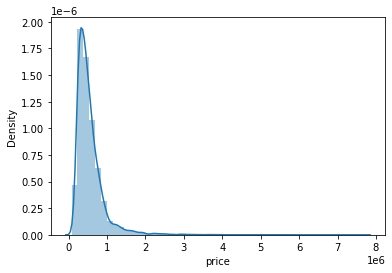

In [39]:
sns.distplot(data['price'])

In [40]:
len(data)*0.01

216.13

In [41]:
data = data.sort_values(['price'], ascending=False).iloc[216:]
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
3281,8964800025,1965000.00,5,3.75,3940,13738,1.50,0,3,4,...,1951,0,98004,47.62,-122.21,2370,13320,2015,2,26
12577,2806300065,1960000.00,4,4.00,4430,31353,2.00,0,0,3,...,1998,0,98005,47.64,-122.16,3900,35237,2015,4,22
12283,1923000260,1959000.00,5,4.50,6200,23373,3.00,0,1,4,...,1988,0,98040,47.56,-122.22,3700,14486,2014,10,15
1152,4055701200,1955000.00,4,2.75,3120,7898,1.00,1,4,4,...,1963,0,98034,47.72,-122.26,2630,13868,2015,4,21
9175,3124059023,1955000.00,3,1.75,3330,12566,1.00,1,4,4,...,1960,0,98040,47.53,-122.22,3730,16560,2015,2,13


/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

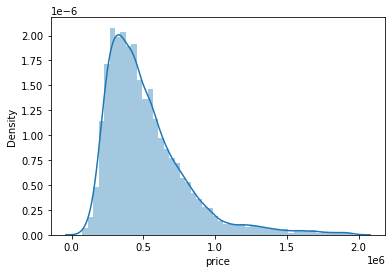

In [42]:
sns.distplot(data['price'])

In [43]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,21397.00,21397.00,21397.00,21397.00,21397.00,21397.00,21397.00,21397.00,21397.00,21397.00,...,21397.00,21397.00,21397.00,21397.00,21397.00,21397.00,21397.00,21397.00,21397.00,21397.00
mean,4586900326.40,518182.95,3.36,2.10,2050.58,14993.18,1.49,0.01,0.22,3.41,...,1970.99,82.27,98078.08,47.56,-122.21,1971.63,12696.74,2014.32,6.58,15.69
std,2877378969.14,284752.66,0.92,0.75,861.48,40978.53,0.54,0.07,0.73,0.65,...,29.31,396.78,53.47,0.14,0.14,668.09,27203.13,0.47,3.12,8.63
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,2014.00,1.00,1.00
25%,2124700015.00,320000.00,3.00,1.50,1420.00,5026.00,1.00,0.00,0.00,3.00,...,1951.00,0.00,98033.00,47.47,-122.33,1480.00,5100.00,2014.00,4.00,8.00
50%,3905000340.00,450000.00,3.00,2.25,1900.00,7576.00,1.50,0.00,0.00,3.00,...,1975.00,0.00,98065.00,47.57,-122.23,1830.00,7600.00,2014.00,6.00,16.00
75%,7322910030.00,635000.00,4.00,2.50,2520.00,10550.00,2.00,0.00,0.00,4.00,...,1997.00,0.00,98118.00,47.68,-122.12,2340.00,10022.00,2015.00,9.00,23.00
max,9900000190.00,1965000.00,33.00,7.50,7730.00,1651359.00,3.50,1.00,4.00,5.00,...,2015.00,2015.00,98199.00,47.78,-121.31,5790.00,871200.00,2015.00,12.00,31.00


### Creating Models

In [45]:
x = data.iloc[:,1:]
y = data.iloc[:,0:1]
X = x.values
Y = y.values

In [48]:
from sklearn.metrics import r2_score

### Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
print(f'R² score: {r2_score(Y, lin_reg.predict(X))*100}')

R² score: 2.84359030842557


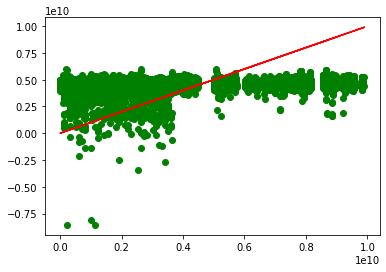

In [54]:
#Linear - Regression Graph
predictArray_lin = lin_reg.predict(X)
plt.scatter(Y,predictArray_lin, color="g")
plt.plot(Y,Y, color="r")

### Polynomial Regression 

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)


print(f'R² score: {r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X)))*100}')

R² score: 11.998807824530777


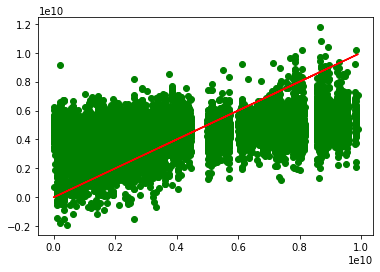

In [57]:
# Polynomial - Regression Graph
predictArray_poly = lin_reg2.predict(poly_reg.fit_transform(X)) 
plt.scatter(Y,predictArray_poly, color="g")
plt.plot(Y,Y, color="r")

### SVR (Support Vector Regression )

In [58]:
#scaling the data

from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_scaled = sc1.fit_transform(X)

sc2=StandardScaler()
y_scaled = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))

In [59]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_scaled,y_scaled)

print(f'R² score: {r2_score(y_scaled, svr_reg.predict(x_scaled))*100}')

R² score: 13.676575895251442


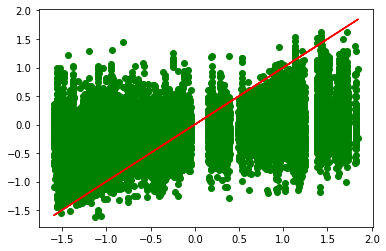

In [60]:
#SVR - Regression Graph
predictArray_svr = svr_reg.predict(x_scaled)
plt.scatter(y_scaled,predictArray_svr, color="g")
plt.plot(y_scaled,y_scaled, color="r") 

### Decison Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

print(f'R² score: {r2_score(Y, r_dt.predict(X))*100}')

R² score: 99.99999999999999


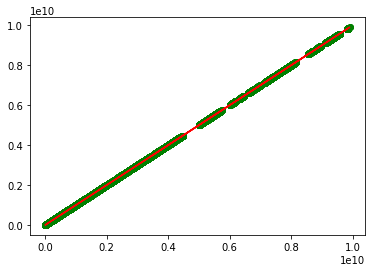

In [72]:
#Decision Tree - Regression Graph
predictArray_dt = r_dt.predict(X)
plt.scatter(Y,predictArray_dt, color="g")
plt.plot(Y,Y, color="r")

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

print(f'R² score: {r2_score(Y, rf_reg.predict(X))*100}')

R² score: 88.79275599988607


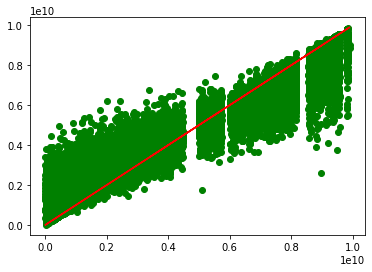

In [74]:
#Random Forest - Regression Graph
predictArray_rf = rf_reg.predict(X)
plt.scatter(Y,predictArray_rf, color="g")
plt.plot(Y,Y, color="r")

### Conclusion

In [65]:
#Creation of R² scores
r2_lin = r2_score(Y, lin_reg.predict(X))*100
r2_poly = r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X)))*100
r2_SVR = r2_score(y_scaled, svr_reg.predict(x_scaled))*100
r2_dt = r2_score(Y, r_dt.predict(X))*100
r2_rf = r2_score(Y, rf_reg.predict(X))*100


Text(0.5, 1.0, 'Random Forest')

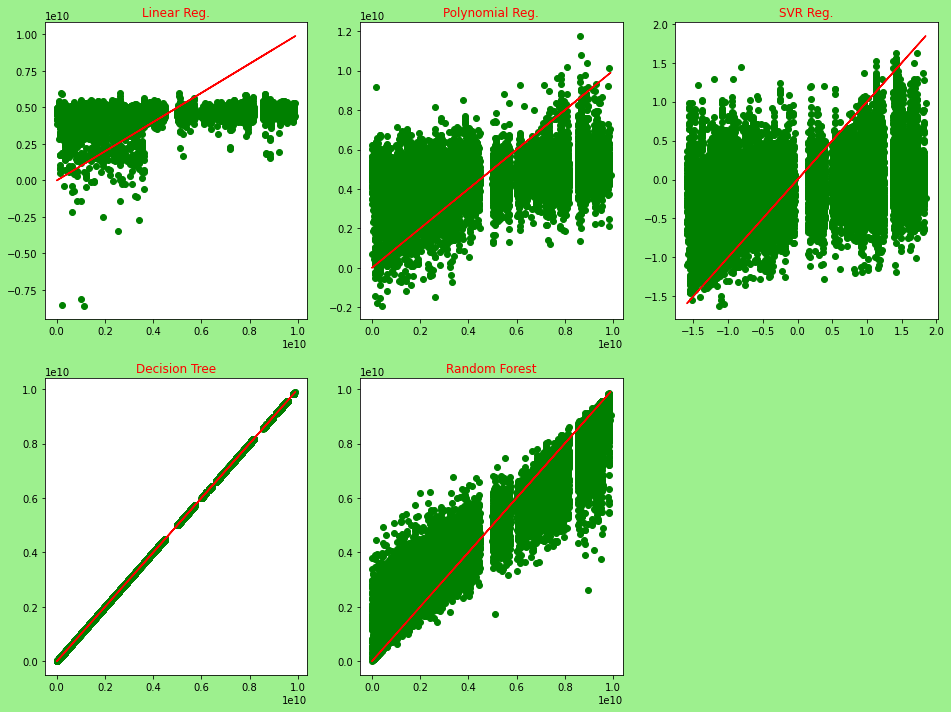

In [71]:
# Regression Graphs - Subplot
plt.figure(figsize=(16,12),facecolor='#9DF08E')
plt.subplot(2,3,1)
plt.scatter(Y,predictArray_lin, color='g')
plt.plot(Y,Y, color='r')
plt.title('Linear Reg.', color='r')

plt.subplot(2,3,2)
plt.scatter(Y,predictArray_poly, color='g')
plt.plot(Y,Y, color='r')
plt.title('Polynomial Reg.', color='r')

plt.subplot(2,3,3)
plt.scatter(y_scaled,predictArray_svr, color="g")
plt.plot(y_scaled,y_scaled, color="r") 
plt.title('SVR Reg.', color='r')

plt.subplot(2,3,4)
plt.scatter(Y,predictArray_dt, color="g")
plt.plot(Y,Y, color='r')
plt.title('Decision Tree', color='r')

plt.subplot(2,3,5)
plt.scatter(Y,predictArray_rf, color="g")
plt.plot(Y,Y, color='r')
plt.title('Random Forest', color='r')

In [68]:
#Printing R² scores
print("------------- R² SCORES OF MODELS ----------------\n")
print(f'Linear Regression R² Score     : {r2_lin}')
print(f'Polynomial Regression R² Score : {r2_poly}')
print(f'SVR R² Score                   : {r2_SVR}')
print(f'Decision Tree R² Score         : {r2_dt}')
print(f'Random Forest R² Score         : {r2_rf}')

------------- R² SCORES OF MODELS ----------------

Linear Regression R² Score     : 2.84359030842557
Polynomial Regression R² Score : 11.998807824530777
SVR R² Score                   : 13.676575895251442
Decision Tree R² Score         : 99.99999999999999
Random Forest R² Score         : 88.79275599988607


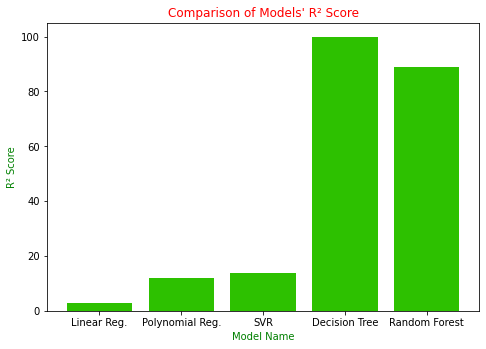

In [69]:
#Bar Graph Display of R² Scores
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparison of Models' R² Score", color='r')
ax.set_xlabel('Model Name', color='g')
ax.set_ylabel('R² Score', color='g')
models_names = ['Linear Reg.', 'Polynomial Reg.', 'SVR', 'Decision Tree', 'Random Forest']
models_r2s = [r2_lin,r2_poly,r2_SVR,r2_dt,r2_rf]
ax.bar(models_names, models_r2s,color="#2DC100")
plt.show()